In [1]:
from zipfile import ZipFile

### Get Dataset folder, Extract and show all files after extracting

In [2]:
# specifying the zip file name
file_name = "data-nlp-disastar-tweets.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files in same folder
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
sample_submission.csv                          2019-12-16 20:36:22        22746
test.csv                                       2019-12-16 20:36:22       420783
train.csv                                      2019-12-16 20:36:22       987712
Extracting all the files now...
Done!


### Import pandas and check out the data

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
data['target'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    0
Name: target, dtype: int64

In [7]:
data.shape

(7613, 5)

### Drop columns with NaN values

In [8]:
data = data.drop(labels=['location', 'keyword'], axis=1)

In [9]:
data.shape

(7613, 3)

### Drop NaN values in the 3 columns we are using

In [10]:
data.dropna(subset=['id', 'target', 'text'])

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


### Tokenize the Data

In [11]:
from nltk.tokenize import word_tokenize
for i in range(len(data)):
    data['text'].iloc[i] = word_tokenize(data['text'].iloc[i])

C:\Python\Python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
for i in range(len(data)):
    print(data['text'].iloc[i])

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada']
['All', 'residents', 'asked', 'to', "'shelter", 'in', 'place', "'", 'are', 'being', 'notified', 'by', 'officers', '.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['13,000', 'people', 'receive', '#', 'wildfires', 'evacuation', 'orders', 'in', 'California']
['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#', 'Alaska', 'as', 'smoke', 'from', '#', 'wildfires', 'pours', 'into', 'a', 'school']
['#', 'RockyFire', 'Update', '=', '>', 'California', 'Hwy', '.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#', 'CAfire', '#', 'wildfires']
['#', 'flood', '#', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou', ',', 'Colorado', 'Springs', 'areas']
['I', "'m", 'on', 'top', 'of', 'the'

['So', 'many', 'Youtube', 'commenters', 'saying', 'the', 'Dothraki', 'would', 'get', 'crushed', 'if', 'they', 'came', 'to', 'Westeros', '...', 'nah', 'bro', 'you', 'underestimate', 'the', 'Dothraki']
['Disillusioned', 'lead', 'character', 'Check', 'Happy', 'go', 'lucky', 'free', 'spirit', 'girl', 'Check', 'Dream', 'life', 'crushed', 'Check', 'Great', 'music', 'Check', 'All', 'Crowe', 'tropes', 'intact']
['Remember', 'how', 'Nora', 'Jones', 'crushed', 'it', 'in', 'Two', 'Weeks', 'Notice', '?']
['How', 'Empire', 'Avenue', 'crushed', 'my', 'soul', 'http', ':', '//t.co/X9OFV1kMv7', 'via', '@', 'markwschaefer']
["'13", 'M.', 'Chapoutier', 'Crozes', 'Hermitage', 'so', 'much', 'purple', 'violets', 'slate', 'crushed', 'gravel', 'white', 'pepper', '.', 'Yum', '#', 'france', '#', 'wine', '#', 'DC', 'http', ':', '//t.co/skvWN38HZ7']
['@', 'TheComedyQuote', '@', '50ShadezOfGrey', 'the', 'thirst', 'has', 'no', 'curfew', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '@', 'P45Perez']
['

['When', 'your', 'child', 'needs', 'emergency', 'care', 'they', 'can', 'be', 'seen', 'in', 'our', 'Emergency', 'Department', 'by', '@', 'radychildrens', 'Specialists', '!', 'http', ':', '//t.co/IGwsTTTkWK']
['STL', 'Ace', 'Grille', '-', 'Surface', 'Mounts', 'SpeedTech', 'Lights', '-', 'Amber', 'Emergency', 'Lights', '-', '544', 'http', ':', '//t.co/t6Seku4yvm', 'http', ':', '//t.co/TJOZ4u4txl']
['the', 'new', 'quest', 'type', 'is', "'level", 'up', 'quest', "'", '.', 'its', 'an', 'always', 'present', 'quest', 'with', 'x2', 'exp', 'designed', 'to', 'help', 'people', 'level', 'up', 'outside', 'of', 'emergency', 'quests']
['11000', 'SEEDS', '30', 'VEGETABLE', 'FRUIT', 'VARIETY', 'GARDEN', 'KIT', 'EMERGENCY', 'SURVIVAL', 'GEAR', 'MRE', '-', 'Full', 'rea\x89Û_', 'http', ':', '//t.co/DchfPXgY2m', 'http', ':', '//t.co/UgHpTzjuLK']
['UPDATE', ':', 'Indiana', 'State', 'Police', 'reopening', 'I-65', 'near', 'Lafayette', 'following', 'emergency', 'bridge', 'repairs', 'that', 'closed', 'key', 'high

['And', 'you', 'wonder', 'why', 'he', "'s", 'injured', 'every', 'year', 'https', ':', '//t.co/XYiwR9JETl']
['Experienced', 'urogyn', 'trying', 'to', 'help', 'mesh', 'injured', 'women', 'talks', 'the', 'worst', 'offenders', '.', 'http', ':', '//t.co/NpOQLkqUP9', '@', 'meshnewsdesk']
['Yelp', 'Bolsters', 'Health', 'Care', 'Reviews', 'With', 'Investigative', 'Journalism', ':', 'Sick', 'and', 'injured', 'patients', 'at', 'a', 'local', 'ER', 'are', 't', '...', 'http', ':', '//t.co/E8aEGOFDY2']
['Terrorists', 'attack', 'police', 'post', ';', '2', 'SPOs', 'injured', 'http', ':', '//t.co/lXMdiseUCn', '#', 'YUG']
['Check', 'this', '@', 'SuryaRay', 'Udhampur', 'terror', 'attack', ':', 'Militants', 'attack', 'police', 'post', '2', 'SPOs', 'injured', ':', '\x89Û_', 'http', ':', '//t.co/ptq3zMgncK', '#', 'SuryaRay', '#', 'India']
['Arian', 'Foster', 'does', 'keep', 'his', 'promise', '...', 'And', 'that', "'s", 'to', 'get', 'injured', 'every', 'yeat']
['#', 'WakeUpFlorida', '...', '#', 'Floridians',

['Come', 'out', 'to', 'Sandstorm', 'tryouts', 'Aug', '15th', 'at', 'Lower', 'Woodland', '!', 'MS', 'Tryout', ':', '3-4:30pm', 'HS', 'Tryout', ':', '4:30-6pm']
['Watch', 'This', 'Airport', 'Get', 'Swallowed', 'Up', 'By', 'A', 'Sandstorm', 'In', 'Under', 'A', 'Minute', 'http', ':', '//t.co/BB7TTdVJWE']
['@', 'VillicanaAlicia', '[', '[', 'Is', 'it', 'Darude', 'Sandstorm', '?', ']', ']']
['I', 'ca', "n't", 'listen', 'to', 'Darude', 'Sandstorm', 'without', 'expecting', 'airhorns', 'now']
['Now', 'playing', ':', 'Darude', '-', 'Sandstorm', '-', 'radio', 'edit', 'http', ':', '//t.co/DUdAIrBBPo', 'http', ':', '//t.co/padosfyXnM']
['Watch', 'This', 'Airport', 'Get', 'Swallowed', 'Up', 'By', 'A', 'Sandstorm', 'In', 'Under', 'A', 'Minute', 'http', ':', '//t.co/bgM4cSrbVd']
['I', 'slammed', 'my', 'phone', 'to', 'the', 'ground', 'and', 'then', 'screamed', 'ahahahga']
['@', 'InfiniteGrace7', 'I', 'just', 'screamed', 'to', 'the', 'world', 'how', 'much', 'I', 'love', 'My', 'Little', 'Pony', '?', '?']


['Twilight', "'s", 'Encore', '(', 'Wounded', 'Hearts', 'Book', '3', ')', 'by', 'Jacquie', 'Biggar', 'http', ':', '//t.co/ZnpTdIcQxE', 'via', '@', 'amazon', '#', 'KindleCountdown', '#', 'Sale', '#', 'MFRWauthor', '#', 'MGTAB']
['Prince', 'Phillip', 'said', 'of', 'the', 'numbers', 'of', 'those', 'murdered', 'by', 'the', 'British', 'at', 'Amritsar', '...', '\x89ÛÏThat\x89Ûªs', 'a', 'bit', 'exaggerated', 'it', 'must', 'include', 'the', 'wounded\x89Û\x9d', '.']
['California', 'cops', 'have', 'sketch', 'of', 'gunman', 'who', 'killed', 'one', 'wounded', 'two', 'deputies', 'via', 'the', '@', 'FoxNews', 'app', 'http', ':', '//t.co/3Ife1zsop7']
['Police', 'Officer', 'Wounded', 'Suspect', 'Dead', 'After', 'Exchanging', 'Shots', ':', 'Richmond', 'police', 'officer', 'wounded', 'suspect', 'killed', 'after', 'exchange', 'of', 'gunfire']
['Let', "'s", 'not', 'forget', 'our', 'wounded', 'female', 'veterans', '.', 'http', ':', '//t.co/rZ7fbr10xw']
['Gunmen', 'kill', 'four', 'in', 'El', 'Salvador', 'bus

In [13]:
data['target'].value_counts(), len(data['target'].value_counts())

(0    4342
 1    3271
 Name: target, dtype: int64,
 2)

In [14]:
labels = data.target.unique()
labels

array([1, 0], dtype=int64)

### PreProcess Data

In [15]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

### Methods :-
    1. Remove stopwords using nltk english stopwords 
    2. Convert text to lower
    3. Remove digits 
    4. Remove punctuation marks and other unnecessary characters in data
    5. Since we are concerned with tweets, we might as well EXPLICITLY remove strings like 'http' & 'https' from our data

In [16]:
def remove_stopwords(text, stop_words):
    ans = ""
    for word in text.split():
        if word not in stop_words:
            ans = ans + " " + word 
    return ans

In [17]:
def to_lower(text):
    ans = ""
    for word in text.split():
        ans = ans + word.lower() + " "
    return ans

punctuations = '''!()[]{};:'"\,.<>/?@#$%^&*_~+-|`='''
digits = '0123456789'

# remove punctuation from the string
def remove_punc(text):
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct       

def remove_digits(text):
    no_digit = ""
    for char in text:
        if char not in digits:
            no_digit = no_digit + char
    return no_digit      

In [18]:
def remove_http(text):
    ans = ""
    for word in text.split():
        if word != 'http':
            if word != 'https':
                ans = ans + " " + word 
    return ans

### Apply the preprocessing methods on the data

In [19]:
data['text'] = data['text'].astype(str)

In [20]:
data['text']=data['text'].apply(lambda x : to_lower(x))
data['text'] = data['text'].apply(lambda x : remove_punc(x))
data['text'] = data['text'].apply(lambda x : remove_digits(x))

In [21]:
#len(stop_words), stop_words

In [22]:
# for i in range(len(data)):
#     print(type(data['text'].iloc[i]))

In [23]:
#data['text'] = data['text'].apply(lambda x: [item for item in x if item not in stop_words])
data['text'] = data['text'].apply(lambda x : remove_stopwords(x, stop_words))

In [24]:
data['text'] = data['text'].apply(lambda x : remove_http(x))

In [25]:
#data['text'][0:5]
len(data['text'][0])

45

In [26]:
data['text'] = data['text'].str.split()
data['text'].head(10)

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
5    [rockyfire, update, california, hwy, closed, d...
6    [flood, disaster, heavy, rain, causes, flash, ...
7                        [top, hill, see, fire, woods]
8    [emergency, evacuation, happening, building, a...
9                      [afraid, tornado, coming, area]
Name: text, dtype: object

In [27]:
# Check some data, before and after the processing methods
data['text'][99]

['car',
 'even',
 'week',
 'got',
 'fucking',
 'car',
 'accident',
 'mfs',
 'ca',
 'nt',
 'fucking',
 'drive']

# Encoding our tokenized words

In [28]:
# res = set()
# # data['text'].str.lower().str.split().apply(res.update)
# data['text'].apply(res.update)
# print(len(res))

### Word Counts

In [29]:
from collections import Counter
res = Counter()
data['text'].apply(res.update)
print(len(res))

21392


In [30]:
sorted_words = res.most_common(len(res))
print(len(res))
print(len(sorted_words))

21392
21392


In [31]:
print(res)

Counter({'nt': 446, 'like': 346, 'amp': 344, 'fire': 252, 'get': 229, 'new': 224, 'via': 220, 'news': 201, 'people': 200, 'one': 195, 'us': 171, 'video': 165, 'emergency': 157, 'disaster': 154, 'would': 143, 'police': 140, 'still': 129, 'time': 126, 'body': 126, 'got': 125, 'california': 121, 'crash': 120, 'burning': 120, 'back': 119, 'storm': 119, 'suicide': 116, 'day': 113, 'know': 112, 'man': 111, 'buildings': 110, 'rt': 108, 'first': 107, 'see': 105, 'pm': 105, 'world': 105, 'ca': 103, 'going': 103, 'bomb': 103, 'fires': 101, 'nuclear': 101, 'love': 100, 'attack': 100, 'today': 99, 'two': 98, 'youtube': 98, 'dead': 97, 'killed': 96, 'go': 95, 'train': 93, 'gt': 92, 'hiroshima': 92, 'car': 91, 'full': 91, 'war': 90, 'accident': 89, 'may': 88, 'could': 88, 'families': 88, 'life': 87, 'good': 87, 'think': 86, 'u': 86, 'say': 85, 'watch': 85, 'many': 84, 'last': 83, 'let': 83, 'years': 80, 'want': 80, 'na': 79, 'way': 79, 'home': 79, 'make': 76, 'collapse': 75, 'work': 74, 'best': 74, 

In [32]:
data['text'][0:10]

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
5    [rockyfire, update, california, hwy, closed, d...
6    [flood, disaster, heavy, rain, causes, flash, ...
7                        [top, hill, see, fire, woods]
8    [emergency, evacuation, happening, building, a...
9                      [afraid, tornado, coming, area]
Name: text, dtype: object

### Most frequent words

In [33]:
print(sorted_words[0:15])

[('nt', 446), ('like', 346), ('amp', 344), ('fire', 252), ('get', 229), ('new', 224), ('via', 220), ('news', 201), ('people', 200), ('one', 195), ('us', 171), ('video', 165), ('emergency', 157), ('disaster', 154), ('would', 143)]


### Create a Dictionary mapping for the tokenized words

In [34]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
len(vocab_to_int), vocab_to_int

(21392,
 {'nt': 1,
  'like': 2,
  'amp': 3,
  'fire': 4,
  'get': 5,
  'new': 6,
  'via': 7,
  'news': 8,
  'people': 9,
  'one': 10,
  'us': 11,
  'video': 12,
  'emergency': 13,
  'disaster': 14,
  'would': 15,
  'police': 16,
  'still': 17,
  'time': 18,
  'body': 19,
  'got': 20,
  'california': 21,
  'crash': 22,
  'burning': 23,
  'back': 24,
  'storm': 25,
  'suicide': 26,
  'day': 27,
  'know': 28,
  'man': 29,
  'buildings': 30,
  'rt': 31,
  'first': 32,
  'see': 33,
  'pm': 34,
  'world': 35,
  'ca': 36,
  'going': 37,
  'bomb': 38,
  'fires': 39,
  'nuclear': 40,
  'love': 41,
  'attack': 42,
  'today': 43,
  'two': 44,
  'youtube': 45,
  'dead': 46,
  'killed': 47,
  'go': 48,
  'train': 49,
  'gt': 50,
  'hiroshima': 51,
  'car': 52,
  'full': 53,
  'war': 54,
  'accident': 55,
  'may': 56,
  'could': 57,
  'families': 58,
  'life': 59,
  'good': 60,
  'think': 61,
  'u': 62,
  'say': 63,
  'watch': 64,
  'many': 65,
  'last': 66,
  'let': 67,
  'years': 68,
  'want': 69,

In [35]:
data.dropna(subset=['text'], inplace=True, axis=0)
len(data['text'])

7613

### Check some data after encoding

In [36]:
data['text'][0]
tweets = []
for i in range(len(data)):
    r = [vocab_to_int[w] for w in (data['text'].iloc[i])]
    tweets.append(r)
print(tweets[0])
print(tweets[1])
print(tweets[2])

[4266, 703, 149, 56, 1412, 4267, 11]
[98, 4, 134, 538, 6447, 6448, 1035]
[1536, 1413, 1922, 539, 6449, 1537, 150, 1922, 539, 1207, 935]


### Get insights on the Tweets' Lengths

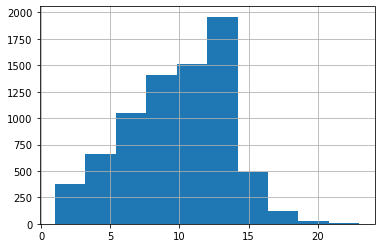

count    7613.000000
mean        9.754105
std         3.602958
min         1.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        23.000000
dtype: float64

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tweetslen = [len(x) for x in tweets]
pd.Series(tweetslen).hist()
plt.show()

pd.Series(tweetslen).describe()

### Might as well remove words that occur less than 5 times as they are extremely less relevant

In [38]:
tweets = [ tweets[i] for i, l in enumerate(tweetslen) if l>0 ]
len(tweets)

7613

### Do padding of the tweets such that they are of equal length before feeding to the model

In [39]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

### So we have now for our training 6573 features where length of each feature is 200

In [40]:
features = pad_features(tweets, 200)
len(features)
# We can use the number of time steps for LSTM layer as the Sequence Length
# i.e. for the second parameter of method 'pad_features'

7613

In [41]:
len(features[999]) # Check length of any random tweet after padding; it's always 200

200

In [42]:
0.9 * len(tweets) # We will use 90% of data for training

6851.7

### Get the labels

In [43]:
encoded_labels = []
for i in range(len(tweets)):
    encoded_labels.append(data['target'].iloc[i])

In [44]:
len(encoded_labels), len(tweets)

(7613, 7613)

In [45]:
import numpy as np
encoded_labels = np.asarray(encoded_labels, dtype=np.int)
#tweets = t.tensor(tweets)

In [46]:
#features.shape, encoded_labels.shape
features.dtype, encoded_labels.dtype

(dtype('int32'), dtype('int32'))

In [47]:
trainx = features[0:5915]
trainy = encoded_labels[0:5915]
validx = features[5915:]
validy = encoded_labels[5915:]
#testx = remaining_x[int(len(remaining_x)*0.5):]
#testy = remaining_y[int(len(remaining_y)*0.5):]

In [48]:
import tensorflow as tf
from tensorflow.keras import regularizers

model = tf.keras.Sequential(
            [
                tf.keras.layers.Embedding(
                    input_dim=len(vocab_to_int)+1,
                    output_dim=400,
                    # Use masking to handle the variable sequence lengths
                    mask_zero=True),
                
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)),
                tf.keras.layers.Dense(64, activation='sigmoid',
                                      kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                        
                                      #activity_regularizer=regularizers.l2(1e-5)
                                     ),
                tf.keras.layers.Dense(1, activation='sigmoid')
            ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 400)         8557200   
_________________________________________________________________
bidirectional (Bidirectional (None, 400)               961600    
_________________________________________________________________
dense (Dense)                (None, 64)                25664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 9,544,529
Trainable params: 9,544,529
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [50]:
model.fit(trainx, trainy, validation_data=(validx, validy), batch_size=400, epochs=10)

Epoch 1/10
15/15 [==============================] - 34s 2s/step - loss: 0.7755 - accuracy: 0.5757 - val_loss: 0.7633 - val_accuracy: 0.5518
Epoch 2/10
15/15 [==============================] - 25s 2s/step - loss: 0.7717 - accuracy: 0.5757 - val_loss: 0.7600 - val_accuracy: 0.5518
Epoch 3/10
15/15 [==============================] - 22s 1s/step - loss: 0.7675 - accuracy: 0.5757 - val_loss: 0.7563 - val_accuracy: 0.5518
Epoch 4/10
15/15 [==============================] - 22s 1s/step - loss: 0.7620 - accuracy: 0.5757 - val_loss: 0.7509 - val_accuracy: 0.5518
Epoch 5/10
15/15 [==============================] - 24s 2s/step - loss: 0.7502 - accuracy: 0.5757 - val_loss: 0.7398 - val_accuracy: 0.5518
Epoch 6/10
15/15 [==============================] - 23s 2s/step - loss: 0.7264 - accuracy: 0.5787 - val_loss: 0.7256 - val_accuracy: 0.5548
Epoch 7/10
15/15 [==============================] - 21s 1s/step - loss: 0.6984 - accuracy: 0.6352 - val_loss: 0.7053 - val_accuracy: 0.6196
Epoch 8/10
15/15 [==

In [51]:
td = pd.read_csv("test.csv")

In [52]:
td.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [53]:
td = td.drop(labels=['location', 'keyword'], axis=1)

In [54]:
td.dropna(subset=['id', 'text'])

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [55]:
td.shape

(3263, 2)

In [56]:
td['text'] = td['text'].apply(lambda x : remove_punc(x))
td['text'] = td['text'].apply(lambda x : remove_digits(x))
td['text'] = td['text'].apply(lambda x : remove_stopwords(x, stop_words))
td['text'] = td['text'].apply(lambda x : remove_http(x))
td['text']=td['text'].apply(lambda x : to_lower(x))

In [57]:
td['text'][:10]

0                    just happened terrible car crash 
1    heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3               apocalypse lighting spokane wildfires 
4                 typhoon soudelor kills china taiwan 
5                          were shakingits earthquake 
6    theyd probably still show life arsenal yesterd...
7                                             hey how 
8                                       what nice hat 
9                                                fuck 
Name: text, dtype: object

In [58]:
for i in range(len(td)):
    td['text'].iloc[i] = word_tokenize(td['text'].iloc[i])

C:\Python\Python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
from collections import Counter
res = Counter()
td['text'].apply(res.update)
print(len(res))

12259


In [60]:
sorted_words = res.most_common(len(res))
print(len(res))
print(len(sorted_words))

12259
12259


In [61]:
sorted_words[:15]

[('i', 496),
 ('the', 274),
 ('like', 145),
 ('amp', 136),
 ('im', 120),
 ('a', 119),
 ('fire', 107),
 ('get', 107),
 ('via', 104),
 ('new', 102),
 ('news', 95),
 ('one', 84),
 ('people', 82),
 ('would', 75),
 ('in', 74)]

In [62]:
vocab_to_int_td = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
len(vocab_to_int_td), vocab_to_int_td

(12259,
 {'i': 1,
  'the': 2,
  'like': 3,
  'amp': 4,
  'im': 5,
  'a': 6,
  'fire': 7,
  'get': 8,
  'via': 9,
  'new': 10,
  'news': 11,
  'one': 12,
  'people': 13,
  'would': 14,
  'in': 15,
  'us': 16,
  'this': 17,
  'dont': 18,
  'to': 19,
  'emergency': 20,
  'attack': 21,
  'video': 22,
  'disaster': 23,
  'first': 24,
  'is': 25,
  'suicide': 26,
  'police': 27,
  'rt': 28,
  'time': 29,
  'got': 30,
  'fires': 31,
  'still': 32,
  'hiroshima': 33,
  'watch': 34,
  'full': 35,
  'storm': 36,
  'crash': 37,
  'you': 38,
  'no': 39,
  'burning': 40,
  'two': 41,
  'my': 42,
  'going': 43,
  'today': 44,
  'love': 45,
  'if': 46,
  'see': 47,
  'body': 48,
  'and': 49,
  'last': 50,
  'go': 51,
  'know': 52,
  'it': 53,
  'think': 54,
  'make': 55,
  'life': 56,
  'world': 57,
  'cant': 58,
  'nuclear': 59,
  'buildings': 60,
  'forest': 61,
  'day': 62,
  'back': 63,
  'dead': 64,
  'pm': 65,
  'need': 66,
  'bomb': 67,
  'we': 68,
  'right': 69,
  'even': 70,
  'bombing': 71,

In [63]:
td.dropna(subset=['text'], inplace=True, axis=0)
len(td['text'])

3263

In [64]:
td['text'][0]
ttweets = []
for i in range(len(td)):
    r = [vocab_to_int_td[w] for w in (td['text'].iloc[i])]
    ttweets.append(r)

In [65]:
ttweets[:5]

[[122, 532, 904, 72, 37],
 [199, 200, 1791, 1013, 651, 810, 351],
 [61, 7, 811, 1792, 3784, 3785, 905, 486, 1, 397, 97, 352],
 [201, 2412, 3786, 1014],
 [437, 735, 171, 1015, 1435]]

In [66]:
tdfeatures = pad_features(ttweets, 200)

In [67]:
tdfeatures.shape

(3263, 200)

In [68]:
#model.predict(tdfeatures)

In [69]:
tdprediction = model.predict(tdfeatures)

In [70]:
for i in range(len(tdprediction)):
    if(tdprediction[i] >= 0.5):
        tdprediction[i] = 1
    else:
        tdprediction[i] = 0

In [107]:
tdprediction

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [108]:
count = 0
for i in range(len(tdprediction)):
    if(tdprediction[i] == 1):
        count = count + 1 
print(count)

740


In [109]:
count = 0
for i in range(len(tdprediction)):
    if(tdprediction[i] == 0):
        count = count + 1 
print(count)

2523


In [110]:
td['id'].shape

(3263,)

In [111]:
#tdpn = np.asarray(tdprediction)

In [112]:
#tdpn = tdpn.astype('int32')

In [113]:
#tdpn, len(tdpn)

(array([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]]),
 3263)

In [114]:
#np.savetxt("testresults.csv", tdpn)

In [116]:
df = pd.DataFrame(tdpn)
df.to_csv('testresults.csv')